# MAS DSE 200: Homework 4 - Regression and Clustering

#### Tasks: 

- Linear Regression on Boston Housing dataset
- Clustering on Weather dataset
  
- Submission on Gradescope:
  - Submit this Jupyter notebook to "Homework 4"

#### Due date: Monday 11/15/2021 at 11:59 PM PST

---

Remember: when in doubt, read the documentation first.

Python - https://docs.python.org/3/

NumPy - https://numpy.org/doc/stable/

pandas - https://pandas.pydata.org/docs/

matplotlib - https://matplotlib.org/stable/contents.html

scikit-learn - https://scikit-learn.org/stable/modules/classes.html

# Author: Matthew Stickle

In [1]:
seed = 42

### Import libraries/functions

In [2]:
import time
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans

## Part 1 - Linear Regression - 10 points

### 1.1 - Read the data from Boston_Housing.csv file - 1 point
* Print the number of rows in the dataframe

In [3]:
data = pd.read_csv('Boston_Housing.csv')

#### Column names in file and their description

CRIM — per capita crime rate by town.

ZN — proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS — proportion of non-retail business acres per town.

CHAS — Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

NOX — nitrogen oxides concentration (parts per 10 million).

RM — average number of rooms per dwelling.

AGE — proportion of owner-occupied units built prior to 1940.

DIS — weighted mean of distances to five Boston employment centres.

RAD — index of accessibility to radial highways.

TAX — full-value property-tax rate per $10,000.

PTRATIO — pupil-teacher ratio by town.

BLACK — 1000(Bk — 0.63)² where Bk is the proportion of blacks by town.

LSTAT — lower status of the population (percent).

MV — median value of owner-occupied homes in $1000s. This is the target variable.

#### See one row of the dataframe

In [4]:
data.iloc[0, :]

CRIM         0.00632
ZN          18.00000
INDUS        2.31000
CHAS         0.00000
NOX          0.53800
RM           6.57500
AGE         65.20000
DIS          4.09000
RAD          1.00000
TAX        296.00000
PTRATIO     15.30000
BLACK      396.90000
LSTAT        4.98000
MV          24.00000
Name: 0, dtype: float64

#### Print `info` of the dataframe

In [5]:
data.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO   BLACK  LSTAT    MV  
0       15.3  396.90   4.98  24

### 1.2 - Feature selection - 1 point

#### Select the following features from the dataframe
* Select the following features from the dataframe - ['CRIM' , 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'BLACK', 'LSTAT', 'MV']
* Print `info` of the resulting DataFrame to verify

In [6]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'BLACK', 'LSTAT', 'MV']
data_subset = data[features]
data_subset.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO   BLACK  LSTAT    MV  
0       15.3  396.90   4.98  24

#### Drop rows where target variable `MV` has null values
* Print the number of remaining rows

In [7]:
data_subset.dropna(subset=['MV'], inplace=True)
data_subset.shape[0]

506

#### Fill null values of remaining columns using mean of the column values

In [8]:
feat_avg = {f: data_subset[f].mean() for f in features}
data_subset.fillna(feat_avg, inplace=True)

### 1.3 - Train test split - 1 point

#### Store features in variable `X` and target MV in variable `y`

In [9]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'BLACK', 'LSTAT']
X = data_subset[features]
y = data_subset['MV']

#### Split the dataset into train and test split
 * Train dataframe and test dataframe with a 75:25 split between them
 * Pass `random_state=seed` to train_test_split function to reproduce results
 * Print the number of rows in train and test dataframes

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
print(f"Train samples: {X_train.shape[0]}\nTest samples: {X_test.shape[0]}")

Train samples: 379
Test samples: 127


### 1.4 - Standardize the data - 1 point

#### Use `StandardScaler` to fit a scaler model
* Use the StandardScaler to standardize your data(only the features, not the target).
* **IMPORTANT** - Use only the training data for scaling
* Standardization results in each column having zero mean and unit standard deviation

In [11]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

#### Scale your training and test data

**NOTE** - Use scaled data for both training and testing in the subsequent tasks

In [12]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Print the mean and standard deviation of each column(for the training data). What do you observe?

* NOTE - The output should have same number of values as the number of features

In [13]:
'''
Mean is approximately 0 for all features and std is 1.
Z-score/standardization of data should result in 0 mean and 1 std
'''

print(f"Mean of scaled train:\n{X_train_scaled.mean(axis=0)}\n \
STD of scaled train:\n{X_train_scaled.std(axis=0)}")

Mean of scaled train:
[-8.43652325e-17  2.22630475e-17  3.35117451e-16 -1.64043508e-17
 -4.89787044e-16 -4.92130523e-17 -9.84261046e-17  1.40608721e-17
  8.08500145e-17  9.72543652e-17 -7.82721879e-16 -1.17173934e-17
 -2.23802214e-16]
 STD of scaled train:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


#### Repeat the same for test data. Is it different from the results of the previous question?

In [14]:
'''
Yes, but this makes sense. The test set has a slightly different mean and standard eviation.
The mean is close to 0 and std is close to 1, but it is not exactly the same which is to be expected.
'''

print(f"Mean of scaled test:\n{X_test_scaled.mean(axis=0)}\n \
STD of scaled test:\n{X_test_scaled.std(axis=0)}")

Mean of scaled test:
[ 0.06951624 -0.04019505  0.0096419  -0.11012204 -0.1216211  -0.21530661
 -0.08242076  0.05967915  0.08716665  0.07029107  0.33777906 -0.09542056
  0.07801058]
 STD of scaled test:
[1.13119029 1.03967212 0.94688298 0.79812475 0.88182689 0.88137933
 1.06154545 0.98685927 1.04678915 1.05771171 0.75901064 1.16102123
 0.99533725]


### 1.5 - Training - 1 points

#### Use `LinearRegression` for training a regression model

In [15]:
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

#### Print the coefficients and intercept of the linear regression model

In [16]:
print(f"Coeffs:\n{regressor.coef_} \
\nintercept:\n{regressor.intercept_}")

Coeffs:
[-1.06546379  0.68154987  0.33928836  0.73726309 -1.93178062  3.14172655
 -0.25586276 -2.95561026  2.21416067 -1.65127265 -2.08714915  1.15235744
 -3.69504236] 
intercept:
22.90791556728232


#### Print the training results
* Print the mean squared error(MSE) and coefficient of determination(r2) of the training data

**IMPORTANT** - r2 score is not a symmetric function. Refer to the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [17]:
train_pred = regressor.predict(X_train_scaled)
train_mse = mean_squared_error(y_true = y_train, y_pred = train_pred)
train_r2 = r2_score(y_train, train_pred)
print(f"MSE: {train_mse}\nr2: {train_r2}")

MSE: 22.340057992152875
r2: 0.748087259862344


### 1.6 - Test the model on test data - 1 point
* Print the MSE and r2 on test data. Is it very different from the result on training data?

In [18]:
'''
The train and test mse are pretty similr. The r2 value is a bit worse than the train r2.
'''

test_pred = regressor.predict(X_test_scaled)
test_mse = mean_squared_error(y_true = y_test, y_pred = test_pred)
test_r2 = r2_score(y_test, test_pred)
print(f"MSE: {test_mse}\nr2: {test_r2}")

MSE: 22.098694827097976
r2: 0.6844267283527132


### 1.7 - Plot results on test data(using matplotlib) - 2 points

 * For the test data, you have true values(labels), and you also have predictions
 * Plot a scatter plot of the true values(in blue) and predicted values(in red) on a single plot so that you can visualize how the predictions look as compared to the ground truth.

**NOTE** - It is NOT a scatter plot of true vs predicted values. Instead, the plot should be a scatter plot of **index vs true values** in blue and **index vs predicted values** in red. Here, index ranges from 0 to length of the dataset

Text(0, 0.5, 'Median House Value ($10000s)')

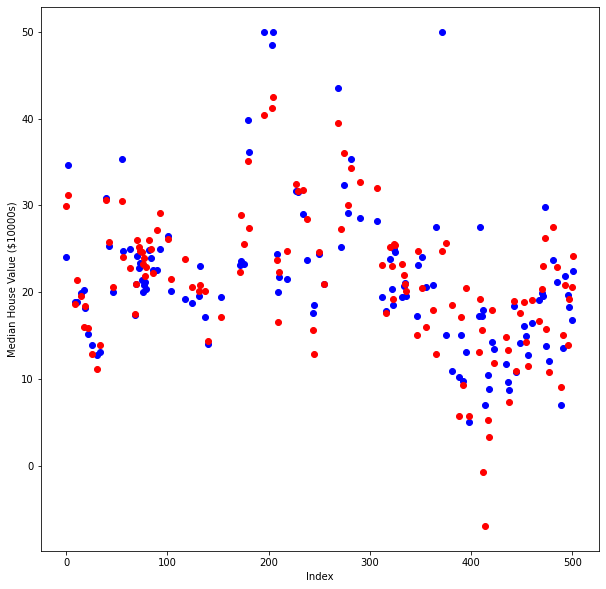

In [19]:
# x_train = X_train.index
x_train_i = X_train.index
x_test_i = X_test.index
plt.figure(figsize=(10,10))
plt.scatter(x_test_i, y_test, c='b')
plt.scatter(x_test_i, test_pred, c='r')
plt.xlabel('Index')
plt.ylabel('Median House Value ($10000s)')

### 1.8 - Repeat training and testing with `ElasticNet` instead of `LinearRegression` - 2 points
* Compute the MSE and r2 score on test data. Are the results better or worse compared to the results obtained using `LinearRegression`?

In [20]:
'''
Elastic net has a higher MSE and a lower r2.
Overall, it seems elastic net is worse, but further tests would be needed to verify claim
(ie: is it significantly different considering MSE and r2 are not that far off from each other)
'''
# Train elastic net
enet = ElasticNet(random_state=seed)
enet.fit(X_train_scaled, y_train)

# Predict with trained elastic net
enet_test_pred = enet.predict(X_test_scaled)

# Get metrics on test data
enet_mse = mean_squared_error(y_true = y_test, y_pred = enet_test_pred)
enet_r2 = r2_score(y_test, enet_test_pred)
print(f"linear MSE: {test_mse}\nlinear r2: {test_r2}\nenet MSE: {enet_mse}\nenet r2: {enet_r2}")

linear MSE: 22.098694827097976
linear r2: 0.6844267283527132
enet MSE: 26.540970518317174
enet r2: 0.6209902455918285


## Part 2 - Clustering - 5 points

### 2.1 - Load Data - 1 point
- Load the "minute_weather.csv" into the Pandas dataframe
- Drop the two columns ["rowID", "hpwren_timestamp"] from the dataframe
- Drop null values from the dataframe
- Print the `info` of the dataframe

In [21]:
weather_data = pd.read_csv('minute_weather.csv')
weather_data.drop(columns=['rowID', 'hpwren_timestamp'], inplace=True)
weather_data.dropna(inplace=True)
weather_data.info

<bound method DataFrame.info of          air_pressure  air_temp  avg_wind_direction  avg_wind_speed  \
1               912.3     63.86               161.0             0.8   
2               912.3     64.22                77.0             0.7   
3               912.3     64.40                89.0             1.2   
4               912.3     64.40               185.0             0.4   
5               912.3     63.50                76.0             2.5   
...               ...       ...                 ...             ...   
1587252         915.9     74.66                 1.0             1.8   
1587253         915.9     74.66                 9.0             1.6   
1587254         915.9     74.66                15.0             1.7   
1587255         915.9     74.66                 8.0             1.8   
1587256         915.9     74.66                12.0             1.9   

         max_wind_direction  max_wind_speed  min_wind_direction  \
1                     215.0             1.5     

### 2.2 - Data preprocessing and standardization - 1 points

#### Split into train and test data
* Split the dataset into train dataframe and test dataframe with a 75:25 split between them
* Pass `random_state=seed` to train_test_split function to reproduce results
* Print the number of rows in the train and test dataframes

In [22]:
w_train, w_test = train_test_split(weather_data, test_size=0.25, random_state=seed)
print(f"Train samples: {w_train.shape[0]}\nTest samples: {w_test.shape[0]}")

Train samples: 1190117
Test samples: 396706


#### Standardize the data

* Use the StandardScaler to standardize your data. Unlike the regression problem, all columns are features here i.e. there is no `target` variable
* **IMPORTANT** - Use only the training data for scaling
* Print out the mean and standard deviation along the feature columns of both the train and the test dataset after standardization. What do you observe?

In [23]:
'''
All of the means for both the train and test set are clsoe to 0. The mean of the train is much closer to 0 than the test which is not unexpected.
Rain accumulation and rain duration are further from the unit standard deviation than the training set.
Rain accumulation in the training set is almost 3x as far from the unit std and rain duration is twice the unit std.
'''

w_scaler = StandardScaler()
w_scaler.fit(w_train)
w_train_scaled = w_scaler.transform(w_train)
w_test_scaled = w_scaler.transform(w_test)
print(f"Mean of scaled train:\n{w_train_scaled.mean(axis=0)}\n \
STD of scaled train:\n{w_train_scaled.std(axis=0)}")
print(f"Mean of scaled test:\n{w_test_scaled.mean(axis=0)}\n \
STD of scaled test:\n{w_test_scaled.std(axis=0)}")

Mean of scaled train:
[-1.81612881e-13 -1.57331235e-15 -4.46941176e-17  2.64815334e-17
  3.38101507e-17  1.07335139e-16 -8.82553594e-17  3.71010133e-16
  4.18671520e-19  2.23888513e-21 -6.90746812e-16]
 STD of scaled train:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean of scaled test:
[ 3.01032775e-03 -4.05684942e-04 -2.94569170e-03  2.44357790e-04
 -3.96447503e-03  1.17821641e-03 -1.72709214e-05 -7.85155543e-04
  6.60442844e-03  4.00526445e-03 -1.08908016e-03]
 STD of scaled test:
[1.00178833 1.00011991 1.00082348 0.99981642 1.00005743 1.00035735
 1.00092705 0.99991437 2.76745539 2.01270681 0.99991031]


### 2.3 - Build a KMeans Clustering Model - 1 point
- Use the standardized training dataset to fit a K-means model with **9** clusters
    * Pass `random_state=seed` to `KMeans` for reproducing results
- Print out the cluster centers found by the model

In [24]:
kmeans = KMeans(n_clusters=9, random_state=seed)
kmeans = kmeans.fit(w_train_scaled)
centers = kmeans.cluster_centers_
centers

array([[ 1.24207712e+00, -2.13292526e-01, -1.15106531e+00,
         1.78360728e+00, -1.05362148e+00,  1.87555120e+00,
        -1.30047028e+00,  1.58815504e+00, -1.46546680e-03,
        -6.48086631e-03, -1.10556579e+00],
       [-2.03917242e-01,  5.52858600e-01,  4.08692516e-01,
         5.24726304e-01,  4.75422894e-01,  4.67546664e-01,
         2.44880763e-01,  5.69099414e-01, -1.47578312e-03,
        -7.30390857e-03, -1.81891374e-01],
       [ 1.11165671e-01,  6.98629545e-01,  8.83166214e-01,
        -6.69809319e-01,  5.92995949e-01, -6.45121222e-01,
         5.97075653e-01, -6.77993887e-01, -1.48921126e-03,
        -7.47029684e-03, -6.04793148e-01],
       [ 2.54621689e-01,  1.77032271e-01, -1.13191438e+00,
        -4.96294548e-01, -1.02154818e+00, -5.20492049e-01,
        -1.30133605e+00, -4.37793952e-01, -1.40225290e-03,
        -5.40161996e-03, -3.17722065e-01],
       [ 7.77684576e-01,  7.01764753e-01, -7.35756670e-01,
        -8.12356822e-01, -5.35854727e-01, -7.01252894e-01,
  

### Evaluate Model - 1 point

- Print out the `inertia_` variable of the model

- Print out the mean of within-cluster sum of squares (MWSSE) on the _train_ and _test_ set

**NOTE** - WSSE is the negative of the [`KMeans.score`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.score) method. Divide it by the length of the dataset to get the mean WSSE

In [25]:
def calc_wsse(k_model, input_matr):
    return -1 * k_model.score(input_matr) / input_matr.shape[0]

In [26]:
print(f"Inertia: {kmeans.inertia_}")
train_wsse = calc_wsse(kmeans, w_train_scaled)
test_wsse = calc_wsse(kmeans, w_test_scaled)
print(f"Train WSSE: {train_wsse}\nTest WSSE: {test_wsse}")

Inertia: 4176049.184457694
Train WSSE: 3.508940032331018
Test WSSE: 4.47883023861959


### 2.5 - Experiment with `k` values from 5 to 10. What `k` value gives the best result on the test data? - 1 point

In [27]:
'''
Based on the WSSE dropping for both train and test, the best choice seems to be k=10.
When plotting the WSSE as a function of number of clusters, the WSSE keeps on dropping without a strong
indication of an elbow. It does look like the train WSSE is starting to level off by the time k=10 as the slope seems to be changing more slowly,
but more k values would need to be ran to verify.
'''
start = time.time()
train_wsse = np.full((6, 1), np.nan)
test_wsse =  np.full((6, 1), np.nan)
train_inertia = np.full((6, 1), np.nan)
for i, k in enumerate(range(5,11)):
    kmeans = KMeans(n_clusters=k, random_state=seed)
    kmeans = kmeans.fit(w_train_scaled)
    train_inertia[i] = kmeans.inertia_
    train_wsse[i] = calc_wsse(kmeans, w_train_scaled)
    test_wsse[i] = calc_wsse(kmeans, w_test_scaled)
    print(f"k: {k}\nTrain WSSE: {train_wsse[i]}\nTest WSSE: {test_wsse[i]}")
print(f"{time.time() - start}")

k: 5
Train WSSE: [5.11117984]
Test WSSE: [5.81197862]
k: 6
Train WSSE: [4.52634299]
Test WSSE: [5.22337223]
k: 7
Train WSSE: [4.08657149]
Test WSSE: [4.77836953]
k: 8
Train WSSE: [3.78880932]
Test WSSE: [4.47878969]
k: 9
Train WSSE: [3.50894003]
Test WSSE: [4.47883024]
k: 10
Train WSSE: [3.30344828]
Test WSSE: [3.99520755]
99.05457592010498


Text(0, 0.5, 'Inertia')

<Figure size 432x288 with 0 Axes>

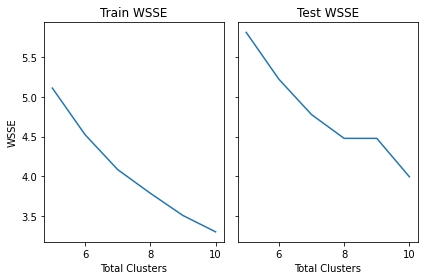

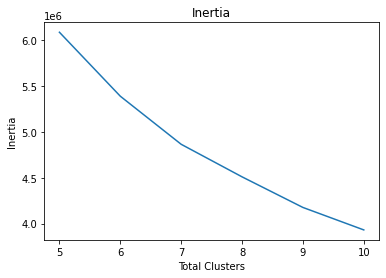

In [28]:
plt.figure()
plt.subplots(1, 2, sharey = True, tight_layout=True)
plt.subplot(1, 2, 1)
plt.plot(list(range(5,11)), train_wsse)
plt.title('Train WSSE')
plt.xlabel('Total Clusters')
plt.ylabel('WSSE')
plt.subplot(1,2,2)
plt.plot(list(range(5,11)), test_wsse)
plt.title('Test WSSE')
plt.xlabel('Total Clusters')

plt.figure()
plt.plot(list(range(5,11)), train_inertia)
plt.title('Inertia')
plt.xlabel('Total Clusters')
plt.ylabel('Inertia')